# **PROYEK AKHIR DATA MINING** : Kelompok 3
## **Klasifikasi Kemiskinan Kab/Kota di Indonesia Berdasarkan IKM (Indeks Kemiskinan Multidimensi) Menggunakan K-Nearest Neighbor (knn)**
- Adam Havenia Pratama (181221006)
- Ivan Adhipradana Putera (181221052)

## **Data Understanding**

Dataset berasal dari kaggle [Klasifikasi tingkat kemiskinan di Indonesia](https://www.kaggle.com/datasets/ermila/klasifikasi-tingkat-kemiskinan-di-indonesia) yang di sesuaikan dengan data IKM(Indeks Kemiskinan Multidimensial) dari BPS (Badan Pusat Statistik). Indikator yang digunakan antara lain, seperti Persentase Penduduk Miskin, Rata-rata lama sekolah 15+, Pengeluaran Per Kapita, Indeks Pembangunan Manusia, Harapan Hidup, Persentase Sanitasi Layak, Persentase Air Minum Layak, Tingkat pengangguran terbuka, Tingkat Partisipasi Angkatan Kerja, dan PDRB ADHK.

### **Import Library**
Pada bagian ini dilakukan pemanggilan terkait dengan pustaka yang akan digunakan dalam proses pengolahan data, evaluasi model.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

- `Pandas` dan `Numpy`: Digunakan untuk melakukan analisis data.
- `Matplotlib` dan `Seaborn`: Digunakan untuk membuat visualisasi data.
- `sklearn` : Digunakan untuk melakukan evaluasi model. 

### **Data Loading**

In [95]:
df = pd.read_csv('Klasifikasi Tingkat Kemiskinan di Indonesia.csv', delimiter=';')

Pada tahapan ini, digunakan library `pandas` untuk membuat sebuah variable yang mendefinisikan dataframe dari data klasifikasi tingkat kemiskinan di Indonesia.

### **EDA**

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Provinsi                                                              514 non-null    object 
 1   Kab/Kota                                                              514 non-null    object 
 2   Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)       514 non-null    object 
 3   Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                           514 non-null    object 
 4   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)          514 non-null    float64
 5   Indeks Pembangunan Manusia                                            514 non-null    object 
 6   Umur Harapan Hidup (Tahun)                                            514 non-null    object 
 7  

In [97]:
kaya = df[df['Klasifikasi Kemiskinan'] == 0]
kaya.head()


,Provinsi,Kab/Kota,Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),Rata-rata Lama Sekolah Penduduk 15+ (Tahun),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Umur Harapan Hidup (Tahun),Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,Persentase rumah tangga yang memiliki akses terhadap air minum layak,Tingkat Pengangguran Terbuka,Tingkat Partisipasi Angkatan Kerja,PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah),Klasifikasi Kemiskinan
0,ACEH,Simeulue,"18,98","9,48",7148.0,"66,41","65,28","71,56","87,45","5,71","71,15",1648096.0,0.0
2,ACEH,Aceh Selatan,"13,18","8,88",8180.0,"67,44","64,4","62,55","79,65","6,46","60,85",4345784.0,0.0
3,ACEH,Aceh Tenggara,"13,41","9,67",8030.0,"69,44","68,22","62,71","86,71","6,43","69,62",3487157.0,0.0
4,ACEH,Aceh Timur,"14,45","8,21",8577.0,"67,83","68,74","66,75","83,16","7,13","59,48",8433526.0,0.0
5,ACEH,Aceh Tengah,"15,26","9,86",10780.0,"73,37","68,86","90,58","90,10","2,61","76,30",5953118.0,0.0


In [98]:
miskin = df[df['Klasifikasi Kemiskinan'] == 1]
miskin.head()

,Provinsi,Kab/Kota,Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),Rata-rata Lama Sekolah Penduduk 15+ (Tahun),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Umur Harapan Hidup (Tahun),Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,Persentase rumah tangga yang memiliki akses terhadap air minum layak,Tingkat Pengangguran Terbuka,Tingkat Partisipasi Angkatan Kerja,PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah),Klasifikasi Kemiskinan
1,ACEH,Aceh Singkil,"20,36","8,68",8776.0,"69,22","67,43","69,56","78,58","8,36","62,85",1780419.0,1.0
46,SUMATERA UTARA,Nias Utara,"25,66","6,77",6155.0,"62,82","69,55","46,09","58,17","3,00","74,27",2417196.0,1.0
47,SUMATERA UTARA,Nias Barat,"26,42","6,69",5924.0,"61,99","69,08","38,02","71,52","0,74","82,08",1285664.0,1.0
84,RIAU,Kepulauan Meranti,"25,68","7,84",7780.0,"65,7","67,78","55,98","88,69","4,43","65,60",13008808.0,1.0
110,SUMATERA SELATAN,Musi Rawas Utara,"20,11","7,09",9855.0,"64,93","65,76","65,90","80,33","6,72","69,69",5706543.0,1.0


**Insight**

Tipe Data: Ada 3 kolom dengan tipe data float64 (Pengeluaran per Kapita, PDB atas Dasar Harga Konstan, Klasifikasi Kemiskinan) dan 10 kolom dengan tipe data object (seperti Provinsi, Kab/Kota, Persentase Penduduk Miskin, dll.), menunjukkan kombinasi data numerik dan kategorikal.

**Hal yang perlu di hightlight**

Kolom `Persentase_Miskin`, `Rata2_Lama_Sekolah`,`Pengeluaran_per_Kapita`, `IPM`, `Umur_Harapan_Hidup`, `Akses_Sanitasi`,`Akses_Air_Minum`, `Tingkat_Pengangguran`, `TPAK`, `PDRB`, `Klasifikasi_Kemiskinan` harusnya bertype data numerik karena menunjukan persentase dan berisi angka-angka.

In [99]:
# Cek missing values
df.isnull().sum()

Provinsi                                                                485
Kab/Kota                                                                485
Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)         485
Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                             485
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)            485
Indeks Pembangunan Manusia                                              485
Umur Harapan Hidup (Tahun)                                              485
Persentase rumah tangga yang memiliki akses terhadap sanitasi layak     485
Persentase rumah tangga yang memiliki akses terhadap air minum layak    485
Tingkat Pengangguran Terbuka                                            485
Tingkat Partisipasi Angkatan Kerja                                      485
PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)              485
Klasifikasi Kemiskinan                                                  485
dtype: int64

**Insight**

Pada semua kolom terdapat 485 missing value atau nilai hilang yang perlu untuk diatasi. 

In [100]:
# Cek Duplikasi data 
df.duplicated().sum()

np.int64(484)

**Insight**
 
Terdapat 484 data duplicate yang perlu diatasi

### **Preprocessing**
Pada tahapan ini akan dilakukan membernarkan type data, membersihkan missing value, menghapus duplikasi, dan mengecek kemiringan data.

In [101]:
# Menghandel kolom yang bertipe data tidak sesuai
convert = df.columns[2:]
for col in convert:
    if df[col].dtype == 'object': 
        df[col] = df[col].str.replace(',', '.').astype(float)

In [102]:
df.columns = [
    'Provinsi', 'Kab/Kota', 'Persentase_Miskin', 'Rata2_Lama_Sekolah', 
    'Pengeluaran_per_Kapita', 'IPM', 'Umur_Harapan_Hidup', 'Akses_Sanitasi', 
    'Akses_Air_Minum', 'Tingkat_Pengangguran', 'TPAK', 'PDRB', 'Klasifikasi_Kemiskinan'
]

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Provinsi                514 non-null    object 
 1   Kab/Kota                514 non-null    object 
 2   Persentase_Miskin       514 non-null    float64
 3   Rata2_Lama_Sekolah      514 non-null    float64
 4   Pengeluaran_per_Kapita  514 non-null    float64
 5   IPM                     514 non-null    float64
 6   Umur_Harapan_Hidup      514 non-null    float64
 7   Akses_Sanitasi          514 non-null    float64
 8   Akses_Air_Minum         514 non-null    float64
 9   Tingkat_Pengangguran    514 non-null    float64
 10  TPAK                    514 non-null    float64
 11  PDRB                    514 non-null    float64
 12  Klasifikasi_Kemiskinan  514 non-null    float64
dtypes: float64(11), object(2)
memory usage: 101.6+ KB


**Insight** 

Tipe data sudah diperbaiki ke dalam type data `float64` atau numerik.

In [104]:
# Menghandel missing values
df_cleaned = df.dropna()

In [105]:
df_cleaned.isnull().sum()

Provinsi                  0
Kab/Kota                  0
Persentase_Miskin         0
Rata2_Lama_Sekolah        0
Pengeluaran_per_Kapita    0
IPM                       0
Umur_Harapan_Hidup        0
Akses_Sanitasi            0
Akses_Air_Minum           0
Tingkat_Pengangguran      0
TPAK                      0
PDRB                      0
Klasifikasi_Kemiskinan    0
dtype: int64

**Insight**

Missing value sudah diatasi dengan menghapus baris dengan nilai yang hilang.

In [106]:
# Cek duplikasi data setelah penghapusan missing values
df_cleaned.duplicated().sum()

np.int64(0)

**Insight**

Dalam sepertinya dengan menghapus semua nilai yang hilang duplikasi data bisa langsung ditangani, kemungkinan besar duplikasi datanya adalah pada kolom yang memiliki nilai kosong atau missing value

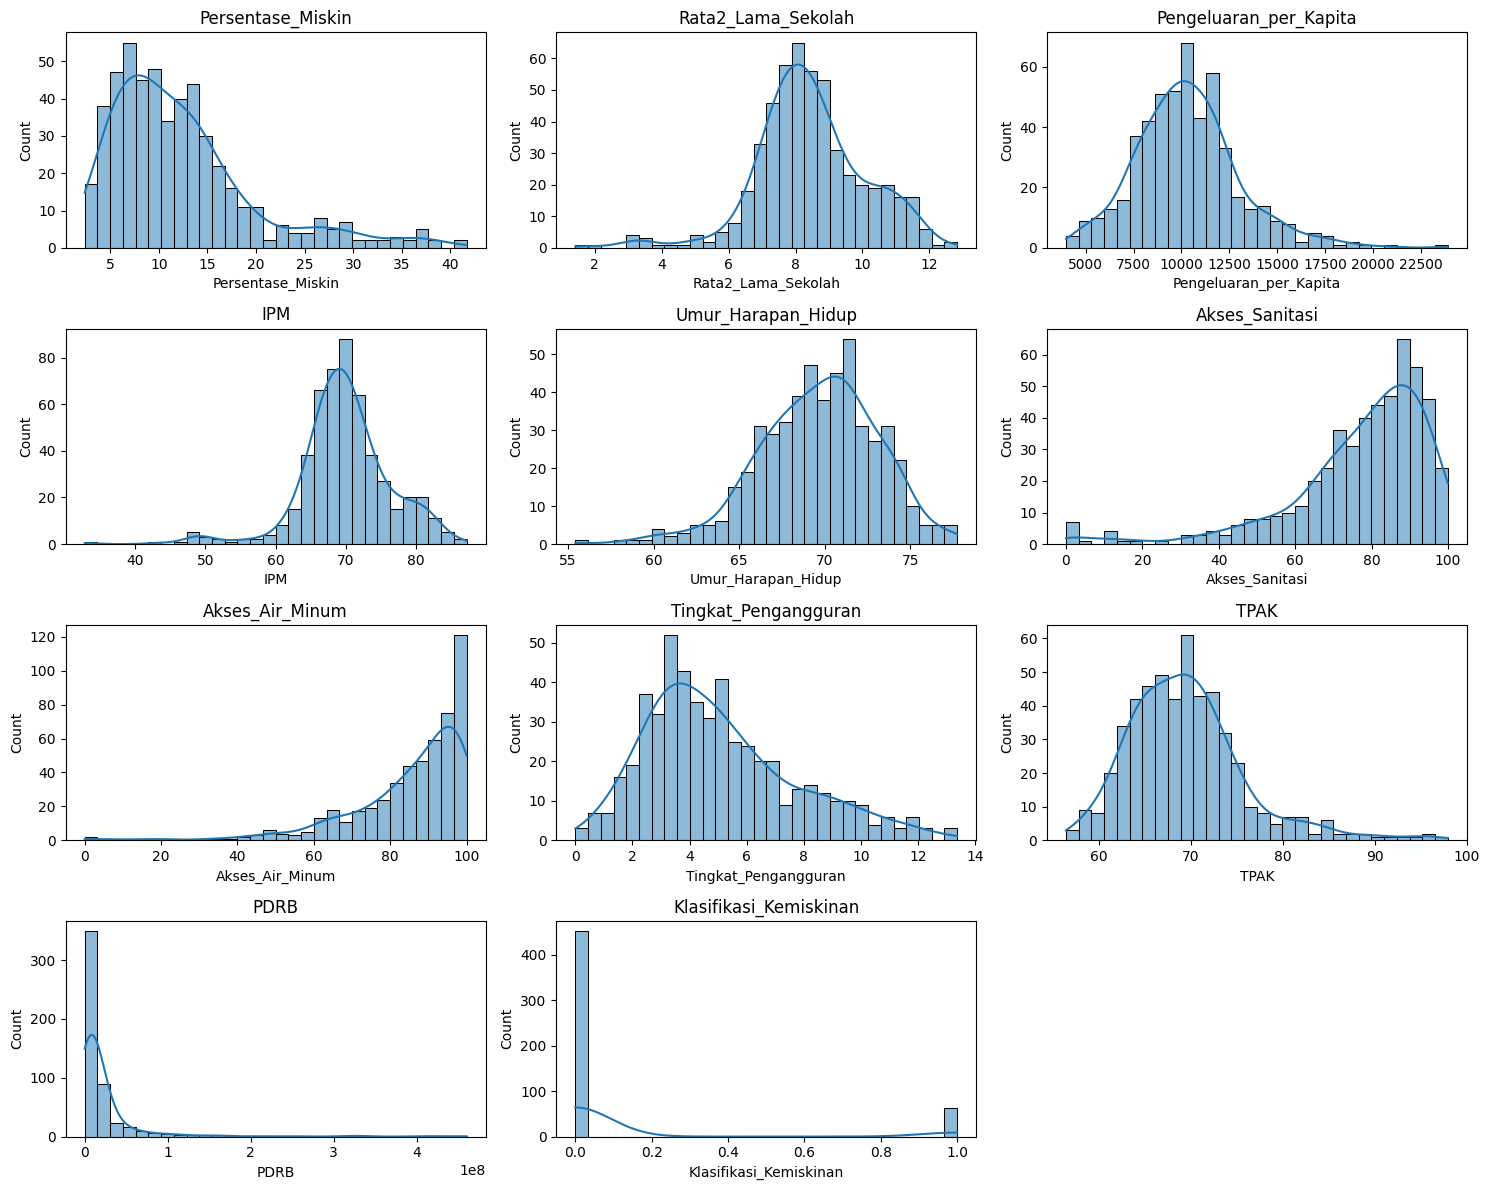

In [107]:
# Cek distribusi data dan kemiringan data
numeric_columns = df_cleaned.select_dtypes(include=["float64"]).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(df_cleaned[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

**Insight**

1. **Distribusi Data**: Sebagian besar variabel (seperti Persentase Miskin, Rata-rata Lama Sekolah, IPM, Umur Harapan Hidup, Akses Sanitasi, Akses Air Minum, TIngkat Pengangguran, TPAT) menunjukkan distribusi yang mendekati normal, dengan puncak di rentang nilai tengah. Namun, variabel seperti Pengeluaran per Kapita, PDBR, dan Klasifikasi Kemiskinan memiliki distribusi yang sangat miring (skewed), dengan mayoritas data terkonsentrasi pada nilai rendah.

2. **Kemiskinan dan Kesejahteraan**: Persentase Miskin cenderung rendah (di bawah 15%), dengan sedikit outlier di atas 30%, menunjukkan mayoritas wilayah memiliki tingkat kemiskinan yang relatif terkontrol. IPM dan Umur Harapan Hidup juga menunjukkan nilai yang cukup tinggi dan konsisten, mencerminkan kesejahteraan yang cukup baik di sebagian besar wilayah.

3. **Akses Layanan Dasar**: Akses Sanitasi dan Akses Air Minum menunjukkan distribusi yang condong ke nilai tinggi (80-100%), menandakan bahwa mayoritas wilayah memiliki akses layanan dasar yang baik, meskipun ada beberapa wilayah dengan akses rendah.

4. **Ekonomi dan Pengangguran**: Pengeluaran per Kapita dan PDBR memiliki distribusi yang sangat miring ke kiri, dengan nilai yang sangat bervariasi, menunjukkan ketimpangan ekonomi antar wilayah. Tingkat Pengangguran cenderung rendah (di bawah 6%), dengan distribusi yang cukup merata.

5. **Klasifikasi Kemiskinan**: Variabel ini sangat terkonsentrasi di nilai rendah (0-0.2), menunjukkan bahwa sebagian besar wilayah memiliki tingkat kemiskinan yang rendah menurut klasifikasi tertentu.

### **Normalisasi**

Pada tahapan ini dipilih metode Min Max Scaler agar semua indikator memiliki nilai seragam. Mengubah nilai ke rentang [0, 1] berdasarkan min dan max setiap kolom.


In [108]:
def normalize_minmax(df):
    # Membuat salinan DataFrame untuk menghindari modifikasi data asli
    normalized_df = df_cleaned.copy()
    
    # Iterasi melalui setiap kolom
    for column in normalized_df.columns:
        # Mengabaikan kolom non-numerik
        if normalized_df[column].dtype in ['int64', 'float64']:
            # Menghitung min dan max untuk kolom tersebut
            min_val = normalized_df[column].min()
            max_val = normalized_df[column].max()
            
            # Menghindari pembagian dengan nol
            if max_val != min_val:
                # Normalisasi menggunakan rumus: (x - min) / (max - min)
                normalized_df[column] = (normalized_df[column] - min_val) / (max_val - min_val)
            else:
                # Jika min == max, set semua nilai ke 0
                normalized_df[column] = 0
    
    return normalized_df

In [109]:
data_normalized = normalize_minmax(df_cleaned)
data_normalized.head()

,Provinsi,Kab/Kota,Persentase_Miskin,Rata2_Lama_Sekolah,Pengeluaran_per_Kapita,IPM,Umur_Harapan_Hidup,Akses_Sanitasi,Akses_Air_Minum,Tingkat_Pengangguran,TPAK,PDRB,Klasifikasi_Kemiskinan
0,ACEH,Simeulue,0.422607,0.706398,0.159301,0.617777,0.441704,0.715815,0.8745,0.427076,0.355320,0.003263,0.0
1,ACEH,Aceh Singkil,0.457739,0.636284,0.241061,0.669488,0.538117,0.695809,0.7858,0.625280,0.155513,0.003550,1.0
2,ACEH,Aceh Selatan,0.274949,0.653812,0.211129,0.636732,0.402242,0.625688,0.7965,0.483171,0.107366,0.009128,0.0
3,ACEH,Aceh Tenggara,0.280804,0.723050,0.203596,0.673537,0.573543,0.627288,0.8671,0.480927,0.318488,0.007261,0.0
4,ACEH,Aceh Timur,0.307281,0.595092,0.231067,0.643909,0.596861,0.667700,0.8316,0.533283,0.074386,0.018016,0.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6080\2946197808.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_normalized["Klasifikasi_Kemiskinan"], palette="pastel")


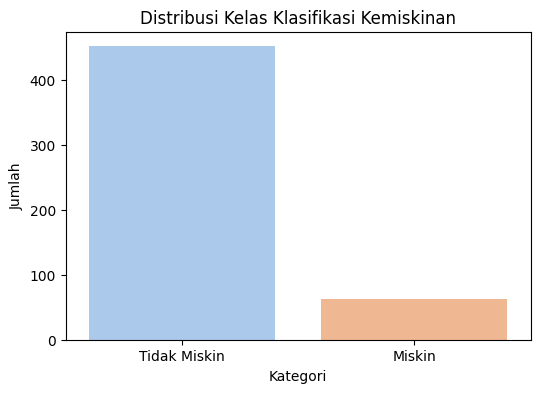

In [110]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data_normalized["Klasifikasi_Kemiskinan"], palette="pastel")
plt.xticks([0, 1], ["Tidak Miskin", "Miskin"])
plt.title("Distribusi Kelas Klasifikasi Kemiskinan")
plt.xlabel("Kategori")
plt.ylabel("Jumlah")
plt.show()

**Insight** 

Terlihat bahwa data antara kabupaten yang miskin dan tidak miskin memiliki selisih yang jauh, hal ini memunkinkan ketika pada tahapan modeling memiliki masalah. tetapi disini kami mencoba melakukan modeling terlebih dahulu untuk mengetahui bagaimana hasil evaluasinya. Jika evaluasinya buruk maka akan dilakukan preposesing smooth atau undersampling maupun oversampling. tetapi jika evaluasinya bagus maka tidak perlu menggunakan teknik tersebut. 

### **Encoding**

Tahapan ini adalah merubah sebuah data kategorikal yaitu pada colom provinsi dan kab/kota menjadi numerik.

In [111]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical = encoder.fit_transform(data_normalized[['Provinsi', 'Kab/Kota']])
df_encoded = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(['Provinsi', 'Kab/Kota']), index=data_normalized.index)

In [112]:
df_final = pd.concat([data_normalized.drop(columns=['Provinsi', 'Kab/Kota']), df_encoded], axis=1)

In [113]:
# Memisahkan fitur dan target
X = df_final.drop(columns=['Klasifikasi_Kemiskinan'])
y = df_final['Klasifikasi_Kemiskinan']

In [114]:
# Mengurangi dimensi dengan PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(df_final)

**Insight**

mengurangi dimensi data dalam df_final menjadi 10 komponen utama, menghasilkan X_pca yang dapat digunakan untuk analisis atau pelatihan model lebih lanjut. PCA membantu menyederhanakan data tanpa kehilangan informasi penting, tetapi memerlukan preprocessing seperti standarisasi data dan pemilihan jumlah komponen yang tepat berdasarkan variansi yang dijelaskan.

### **Spliting** 

Tahapan ini adalah proses dimana pemisahan data latih dengan proporsi 80/20. dimana 80% untuk data training dan 20% untuk data testing.

In [115]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

### **Modeling**

Tahapan ini adalah melakukan prediksi menggunakan algoritma K-Nearest Neighbors (KNN).
    
Parameters:
- X_train (numpy.ndarray): Fitur data latih (n_samples, n_features)
- y_train (numpy.ndarray): Label data latih (n_samples,)
- X_test (numpy.ndarray): Fitur data uji (m_samples, n_features)
- k (int): Jumlah tetangga terdekat yang digunakan
    
Returns:
numpy.ndarray: Prediksi label untuk data uji


In [116]:
def knn_predict(X_train, y_train, X_test, k):

    # Inisialisasi array untuk menyimpan prediksi
    predictions = []
    
    # Iterasi melalui setiap sampel dalam data uji
    for x_test in X_test:
        # Menghitung jarak Euclidean antara x_test dan semua x_train
        distances = np.sqrt(np.sum((X_train - x_test) ** 2, axis=1))
        
        # Mendapatkan indeks k tetangga terdekat
        k_nearest_indices = np.argsort(distances)[:k]
        
        # Mendapatkan label dari k tetangga terdekat
        k_nearest_labels = y_train[k_nearest_indices]
        
        # Menentukan label mayoritas menggunakan modus
        unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
        predicted_label = unique_labels[np.argmax(counts)]
        
        # Menambahkan prediksi ke daftar
        predictions.append(predicted_label)
    
    return np.array(predictions)

#### **Menentukan best k** 
**Tujuan**
- Mengevaluasi performa model KNN dengan berbagai nilai k menggunakan validasi silang.
- Memilih nilai k yang optimal berdasarkan akurasi rata-rata tertinggi, sehingga model KNN dapat digunakan dengan parameter terbaik untuk prediksi pada data baru.

In [117]:
def cross_val_score_manual(X, y, k, cv=5):
    n_samples = len(X)
    fold_size = n_samples // cv
    scores = []
    
    for i in range(cv):
        # Membagi data menjadi train dan test fold
        start_idx = i * fold_size
        end_idx = (i + 1) * fold_size if i < cv - 1 else n_samples
        X_test_fold = X[start_idx:end_idx]
        y_test_fold = y[start_idx:end_idx]
        X_train_fold = np.concatenate([X[:start_idx], X[end_idx:]])
        y_train_fold = np.concatenate([y[:start_idx], y[end_idx:]])
        
        # Prediksi dan hitung akurasi
        y_pred = knn_predict(X_train_fold, y_train_fold, X_test_fold, k)
        accuracy = np.mean(y_pred == y_test_fold)
        scores.append(accuracy)
    
    return np.mean(scores)

# Mencari best_k
k_values = range(3, 21)
cv_scores = [cross_val_score_manual(X_train, y_train, k, cv=5) for k in k_values]
best_k = k_values[np.argmax(cv_scores)]

print(f"Best k: {best_k}")

Best k: 3


In [118]:
# Mengonversi data ke format numpy array
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)

# Membuat prediksi dengan k=3
predict = knn_predict(X_train_np, y_train_np, X_test_np, 3)

In [119]:
# Cek Prediksi
predict

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       0.])

### **Evaluasi Model** 

**Tujuan** 
mengevaluasi performa model klasifikasi dengan menghitung berbagai metrik evaluasi standar:

+ Akurasi untuk gambaran umum performa.
+ Presisi dan recall untuk menilai trade-off antara kesalahan false positive dan false negative.
+ F1-score untuk keseimbangan presisi dan recall.
+ ROC-AUC untuk mengevaluasi kemampuan pemisahan kelas.
+ Confusion matrix untuk analisis rinci kesalahan prediksi.
+ Laporan klasifikasi untuk ringkasan metrik per kelas.

In [120]:
# Model Evaluation
accuracy = accuracy_score(y_test, predict)
precision = precision_score(y_test, predict)
recall = recall_score(y_test, predict)
f1 = f1_score(y_test, predict)
roc_auc = roc_auc_score(y_test, predict)
conf_matrix = confusion_matrix(y_test, predict)
classification_rep = classification_report(y_test, predict)

In [121]:
print(f"Best K: {best_k}")
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print(f"ROC AUC: {roc_auc:.2%}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Best K: 3
Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%
ROC AUC: 100.00%
Confusion Matrix:
 [[91  0]
 [ 0 12]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        91
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



Model K-Nearest Neighbors (KNN) dengan nilai **best K = 3** menunjukkan performa sempurna pada data uji, dengan **akurasi 100%**, **presisi 100%**, **recall 100%**, **F1-score 100%**, dan **ROC-AUC 100%**, serta confusion matrix yang menunjukkan tidak ada kesalahan prediksi ([91, 0], [0, 12]). Laporan klasifikasi juga mengonfirmasi bahwa model mencapai presisi, recall, dan F1-score sebesar **1.00** untuk kedua kelas yaitu tidak miskin dan miskin (0 dan 1), dengan support masing-masing **91** dan **12** sampel, menghasilkan rata-rata makro dan tertimbang sebesar **1.00** untuk semua metrik.

### **Menentukan fitur paling penting**


- PC1: Persentase Kemiskinan
- PC2: PDRB
- PC3: Indeks Pembangunan Manusia (IPM)
- PC4: Umur Harapan Hidup
- PC5: Tingkat Pengangguran
- PC6: Pengeluaran per Kapita
- PC7: Rata-rata Lama Sekolah
- PC8: Provinsi 
- PC9: TPAK (Tingkat Partisipasi Angkatan Kerja)
- PC10: Akses Sanitasi

In [122]:
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

# Function to calculate feature importance through permutation
def calculate_feature_importance(X, y, k=3, n_repeats=10):
    baseline_score = np.mean(y == knn_predict(X_train_np, y_train_np, X, k))
    importance_scores = []
    
    for feature in range(X.shape[1]):
        scores = []
        for _ in range(n_repeats):
            # Create a permuted copy of the feature
            X_permuted = X.copy()
            np.random.shuffle(X_permuted[:, feature])
            
            # Calculate permuted score
            permuted_score = np.mean(y == knn_predict(X_train_np, y_train_np, X_permuted, k))
            scores.append(baseline_score - permuted_score)
        
        importance_scores.append(np.mean(scores))
    
    return np.array(importance_scores)

# Calculate feature importance
importance_scores = calculate_feature_importance(X_train_np, y_train_np)

# Create DataFrame with feature importance
knn_importance_df = pd.DataFrame({
    'Feature': [f'PC{i+1}' for i in range(X_train.shape[1])],
    'Importance': importance_scores
}).sort_values(by='Importance', ascending=False)

# Display results
print("\nFeature Importance:")
print(knn_importance_df)


Feature Importance:
  Feature  Importance
0     PC1    0.194404
1     PC2    0.006813
5     PC6    0.001946
4     PC5    0.000243
3     PC4    0.000000
2     PC3    0.000000
6     PC7    0.000000
7     PC8    0.000000
8     PC9    0.000000
9    PC10    0.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6080\501472049.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=knn_importance_df['Importance'], y=knn_importance_df['Feature'], palette='coolwarm')


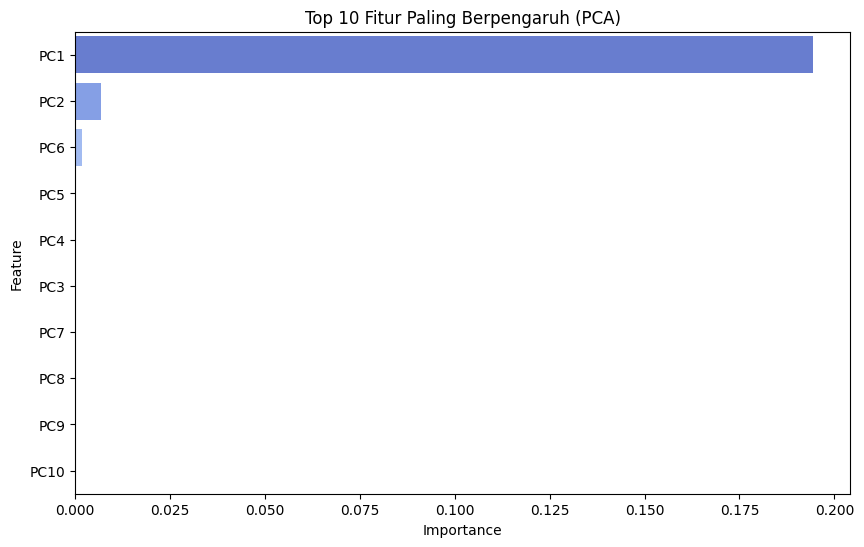

In [123]:
# Visualizing Top 10 Important Features
plt.figure(figsize=(10, 6))
sns.barplot(x=knn_importance_df['Importance'], y=knn_importance_df['Feature'],legend=False)
plt.title("Top 10 Fitur Paling Berpengaruh (PCA)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

**Kesimpulan**
Berdasarkan analisis di atas, berikut adalah kesimpulannya
- **Faktor Utama Kemiskinan**: `Persentase Kemiskinan` (`PC1`) adalah prediktor paling berpengaruh dalam model KNN, dengan skor pentingnya yang jauh melampaui fitur lainnya (0.190511). Ini menegaskan bahwa tingkat kemiskinan itu sendiri adalah indikator kuat untuk klasifikasi status kemiskinan, kemungkinan karena data ini langsung mencerminkan kondisi aktual.
- **Kontribusi Sekunder**: `PDRB` (`PC2`) dan `Pengeluaran per Kapita` (`PC6`) memberikan kontribusi tambahan, meskipun sangat kecil (masing-masing 0.006813 dan 0.002920). Ini menunjukkan bahwa aspek ekonomi makro (PDRB) dan individu (Pengeluaran per Kapita) memiliki peran pendukung, tetapi tidak sekuat `Persentase Kemiskinan`.
- **Fitur Lain Minim Pengaruh**: Fitur seperti `IPM`, `Umur Harapan Hidup`, `Tingkat Pengangguran`, `Provinsi`, `Rata-rata Lama Sekolah`, `TPAK`, dan `Akses Sanitasi` (`PC3`, `PC4`, `PC5`, `PC7`, `PC8`, `PC9`, `PC10`) memiliki skor pentingnya mendekati nol. Ini bisa berarti:
  - Fitur-fitur ini memiliki korelasi tinggi dengan `Persentase Kemiskinan`, sehingga variasinya sudah tercakup dalam `PC1`.
  - Model KNN mungkin tidak memanfaatkan informasi dari fitur ini secara efektif setelah reduksi dimensi PCA.
- **Efektivitas PCA**: Hanya beberapa komponen utama (`PC1`, `PC2`, `PC6`) yang relevan, yang menunjukkan bahwa PCA berhasil mereduksi dimensi data menjadi beberapa fitur utama yang menjelaskan sebagian besar variasi yang berguna untuk prediksi.
- **Implikasi untuk Kebijakan**: Fokus kebijakan untuk mengurangi kemiskinan sebaiknya lebih ditekankan pada pengendalian `Persentase Kemiskinan` secara langsung, dengan perhatian tambahan pada peningkatan `PDRB` dan `Pengeluaran per Kapita` sebagai faktor pendukung.

**Rekomendasi**
- **Analisis Lebih Lanjut**: Periksa korelasi antara `Persentase Kemiskinan` dengan fitur lain (misalnya, `IPM`, `PDRB`) untuk memahami mengapa kontribusi fitur lain rendah. Ini bisa dilakukan dengan matriks korelasi atau analisis loadings PCA.
- **Optimasi Model**: Jika skor pentingnya fitur lain mendekati nol, pertimbangkan untuk menggunakan hanya `PC1`, `PC2`, dan `PC6` dalam model untuk meningkatkan efisiensi komputasi tanpa kehilangan performa signifikan.
- **Validasi Data**: Pastikan data `Provinsi` (yang bersifat kategorikal) telah dikonversi dengan benar (misalnya, one-hot encoding) sebelum PCA, karena fitur kategorikal dapat memengaruhi hasil jika tidak diproses dengan baik.